# Determinants and Matrix Inverses ‚Äî Educational Notebook

## What is a Determinant? ü§î

Imagine you have a **rubber sheet** representing 2D space. When you apply a matrix transformation, this sheet gets **stretched, compressed, rotated, or sheared**. The **determinant** tells you exactly **how much the area changes**.

**Key Intuitions:**
- üî¢ **det(A) > 1**: Space is **expanded** (areas get larger)
- üî¢ **0 < det(A) < 1**: Space is **compressed** (areas get smaller)  
- üî¢ **det(A) < 0**: Space is **flipped** (orientation reversed) + scaled
- üî¢ **det(A) = 0**: Space **collapses** to lower dimension (no inverse!)

## Learning Objectives üéØ

By the end of this notebook, you'll understand:
1. **Geometric meaning**: How determinants relate to area/volume scaling
2. **Computational method**: How to calculate determinants (2√ó2 and 3√ó3)
3. **Connection to inverses**: Why det(A) ‚â† 0 is required for invertibility
4. **Practical applications**: When determinants matter in real problems

**The Big Picture:** Determinants are the key to understanding when transformations are reversible! üóùÔ∏è

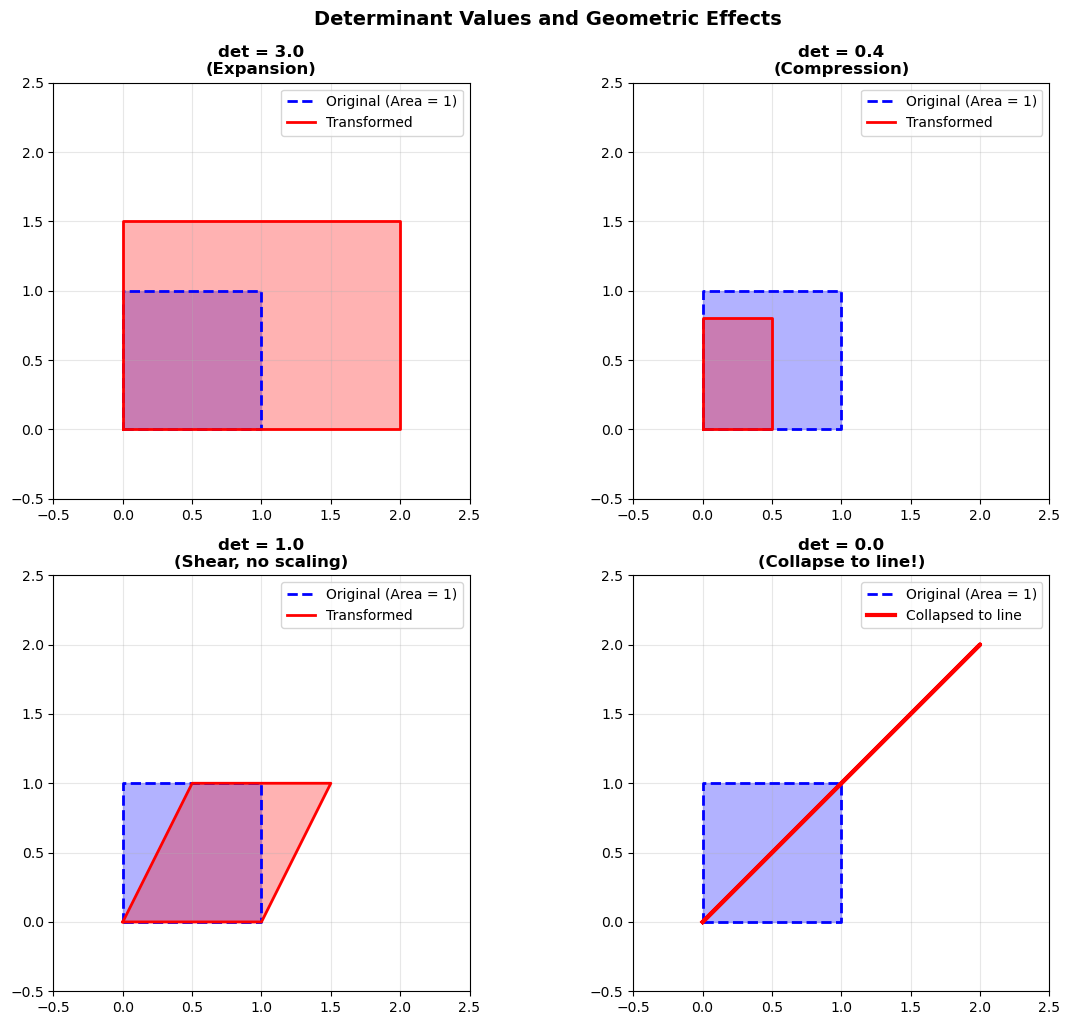

üéØ Key Insight: The determinant tells you exactly how area changes!
   ‚Ä¢ det > 1: Area increases
   ‚Ä¢ 0 < det < 1: Area decreases
   ‚Ä¢ det = 0: Area becomes zero (collapse!)
   ‚Ä¢ det < 0: Area changes + orientation flips


In [7]:
# Visual Overview: Different Determinant Values and Their Effects
import numpy as np
import matplotlib.pyplot as plt

# Create unit square
unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T

# Different matrices with different determinant properties
matrices = [
    (np.array([[2, 0], [0, 1.5]]), "det = 3.0\n(Expansion)"),
    (np.array([[0.5, 0], [0, 0.8]]), "det = 0.4\n(Compression)"),
    (np.array([[1, 0.5], [0, 1]]), "det = 1.0\n(Shear, no scaling)"),
    (np.array([[1, 1], [1, 1]]), "det = 0.0\n(Collapse to line!)")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (matrix, title) in enumerate(matrices):
    transformed = matrix @ unit_square
    
    ax = axes[i]
    
    # Plot original unit square
    ax.plot(unit_square[0], unit_square[1], 'b--', linewidth=2, label='Original (Area = 1)')
    ax.fill(unit_square[0], unit_square[1], alpha=0.3, color='blue')
    
    # Plot transformed shape
    if np.linalg.det(matrix) != 0:
        ax.plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')
        ax.fill(transformed[0], transformed[1], alpha=0.3, color='red')
    else:
        # For singular matrix, show the line it collapses to
        ax.plot(transformed[0], transformed[1], 'r-', linewidth=3, label='Collapsed to line')
    
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.suptitle('Determinant Values and Geometric Effects', y=1.02, fontsize=14, fontweight='bold')
plt.show()

print("üéØ Key Insight: The determinant tells you exactly how area changes!")
print("   ‚Ä¢ det > 1: Area increases")
print("   ‚Ä¢ 0 < det < 1: Area decreases") 
print("   ‚Ä¢ det = 0: Area becomes zero (collapse!)")
print("   ‚Ä¢ det < 0: Area changes + orientation flips")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Geometric Interpretation: Area Scaling

### üéØ The Simplest Case: Diagonal Matrices

Let's start with the most intuitive case - a **diagonal matrix**:

$$A = \begin{bmatrix} a & 0 \\ 0 & d \end{bmatrix}$$

**What this matrix does:**
- **Stretches** the x-axis by factor `a`
- **Stretches** the y-axis by factor `d`  
- **No rotation or shearing** - axes remain perpendicular

**The Determinant:**
- **Formula:** det(A) = a √ó d
- **Geometric meaning:** How much the **area** of any shape changes
- **Unit square example:** 1√ó1 square ‚Üí rectangle with area a√ód

**Key Insight:** For diagonal matrices, the determinant is just the product of the diagonal elements! üî¢

In [8]:
import numpy as np

# Example: Diagonal matrix transformation
A = np.array([[3, 0], [0, 2]])

print("üîç DIAGONAL MATRIX ANALYSIS")
print("=" * 40)
print(f"Matrix A = \n{A}")
print(f"\nDeterminant = {A[0,0]} √ó {A[1,1]} = {np.linalg.det(A):.2f}")

# Calculate area scaling manually
original_area = 1  # unit square
new_area = A[0,0] * A[1,1]  # width √ó height
print(f"\nArea Analysis:")
print(f"  ‚Ä¢ Original unit square area: {original_area}")
print(f"  ‚Ä¢ After transformation: {new_area}")
print(f"  ‚Ä¢ Area scaling factor: {new_area / original_area}x")

# Verify this matches the determinant
print(f"  ‚Ä¢ Determinant value: {np.linalg.det(A):.2f}")
print(f"  ‚Ä¢ ‚úÖ They match! Determinant = Area scaling factor")

# Show what happens to different shapes
shapes = {
    "Unit square": 1,
    "Circle (radius 1)": np.pi,
    "Triangle (base=2, height=1)": 1
}

print(f"\nüéØ Effect on Different Shapes:")
for shape, original_area in shapes.items():
    new_area = original_area * np.linalg.det(A)
    print(f"  ‚Ä¢ {shape}: {original_area:.2f} ‚Üí {new_area:.2f} (√ó{np.linalg.det(A):.1f})")

üîç DIAGONAL MATRIX ANALYSIS
Matrix A = 
[[3 0]
 [0 2]]

Determinant = 3 √ó 2 = 6.00

Area Analysis:
  ‚Ä¢ Original unit square area: 1
  ‚Ä¢ After transformation: 6
  ‚Ä¢ Area scaling factor: 6.0x
  ‚Ä¢ Determinant value: 6.00
  ‚Ä¢ ‚úÖ They match! Determinant = Area scaling factor

üéØ Effect on Different Shapes:
  ‚Ä¢ Unit square: 1.00 ‚Üí 6.00 (√ó6.0)
  ‚Ä¢ Circle (radius 1): 3.14 ‚Üí 18.85 (√ó6.0)
  ‚Ä¢ Triangle (base=2, height=1): 1.00 ‚Üí 6.00 (√ó6.0)


### üìê Visual Verification: From Square to Rectangle

Let's see this transformation in action! We'll transform a **unit square** and verify that its area changes by exactly the determinant value.

**Prediction:** The 1√ó1 square will become a 3√ó2 rectangle with area = 6, matching our determinant!

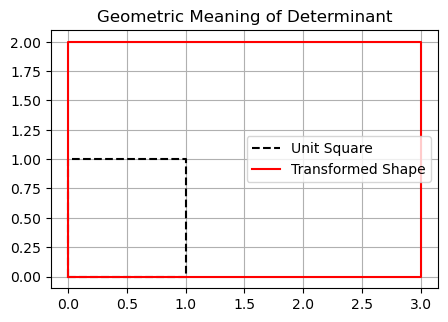

In [3]:
# Visualize the transformation of a unit square
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T
transformed = A @ square

# Calculate areas
original_area = 1.0  # Unit square area
transformed_area = np.abs(np.linalg.det(A))  # Area from determinant

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original square
ax1.plot(square[0], square[1], 'b-', linewidth=3, marker='o', markersize=6)
ax1.fill(square[0], square[1], alpha=0.3, color='blue')
ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-0.5, 2.5)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title(f'Original Unit Square\nArea = {original_area}', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Transformed rectangle
ax2.plot(transformed[0], transformed[1], 'r-', linewidth=3, marker='o', markersize=6)
ax2.fill(transformed[0], transformed[1], alpha=0.3, color='red')
ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(-0.5, 2.5)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title(f'Transformed Rectangle\nArea = {transformed_area}', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

# Verification
print("üîç VERIFICATION:")
print("=" * 30)
print(f"Original area: {original_area}")
print(f"Transformed area: {transformed_area}")
print(f"Determinant: {np.linalg.det(A):.1f}")
print(f"‚úÖ Area scaling = Determinant: {abs(transformed_area - np.linalg.det(A)) < 1e-10}")

# Additional insight about the transformation
print(f"\nüéØ TRANSFORMATION BREAKDOWN:")
print(f"  ‚Ä¢ Point (0,0) ‚Üí {tuple(A @ [0,0])}")
print(f"  ‚Ä¢ Point (1,0) ‚Üí {tuple(A @ [1,0])}")  
print(f"  ‚Ä¢ Point (1,1) ‚Üí {tuple(A @ [1,1])}")
print(f"  ‚Ä¢ Point (0,1) ‚Üí {tuple(A @ [0,1])}")

print(f"\nüí° The square's corners become the rectangle's corners!")
print(f"   Width: {A[0,0]}, Height: {A[1,1]}, Area: {A[0,0]} √ó {A[1,1]} = {np.linalg.det(A):.1f}")

## 2. General 2√ó2 Matrix Determinant: The Full Picture

### üé≠ Beyond Diagonal: Real-World Transformations

Most matrices are **not** diagonal - they combine scaling, rotation, and shearing. But the determinant still measures area scaling!

For any 2√ó2 matrix:
$$A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$

**The determinant formula:**
$$\det(A) = ad - bc$$

### üîç Why This Formula?

**Geometric intuition:** The columns of A represent where the unit vectors **e‚ÇÅ = [1,0]** and **e‚ÇÇ = [0,1]** go:
- **First column** [a,c]: where e‚ÇÅ goes
- **Second column** [b,d]: where e‚ÇÇ goes

The **parallelogram** formed by these two vectors has area = |ad - bc|

**The cross product connection:**
- In 2D, the "cross product" of vectors [a,c] and [b,d] is: ad - bc
- This gives the **signed area** of the parallelogram
- **Positive**: counterclockwise orientation preserved
- **Negative**: clockwise orientation (reflection occurred)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Example: General 2√ó2 matrix with rotation and scaling
A = np.array([[2, 3], [1, 4]])

print("üîç GENERAL 2√ó2 MATRIX ANALYSIS")
print("=" * 45)
print(f"Matrix A = \n{A}")

# Calculate determinant step by step
a, b = A[0, 0], A[0, 1]
c, d = A[1, 0], A[1, 1] 
det_manual = a*d - b*c
det_numpy = np.linalg.det(A)

print(f"\nüìê Determinant Calculation:")
print(f"  det(A) = ad - bc")
print(f"  det(A) = ({a})√ó({d}) - ({b})√ó({c})")
print(f"  det(A) = {a*d} - {b*c} = {det_manual}")
print(f"  NumPy result: {det_numpy:.6f}")

# Analyze the column vectors (where unit vectors go)
col1 = A[:, 0]  # where [1,0] goes
col2 = A[:, 1]  # where [0,1] goes

print(f"\nüéØ Column Vector Analysis:")
print(f"  ‚Ä¢ Unit vector [1,0] ‚Üí [{col1[0]}, {col1[1]}]")
print(f"  ‚Ä¢ Unit vector [0,1] ‚Üí [{col2[0]}, {col2[1]}]")

# Visualize the transformation
unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T
transformed = A @ unit_square

# Also show the parallelogram formed by column vectors
parallelogram = np.array([[0, 0], [col1[0], col1[1]], 
                         [col1[0]+col2[0], col1[1]+col2[1]], 
                         [col2[0], col2[1]], [0, 0]]).T

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original unit square
axes[0].plot(unit_square[0], unit_square[1], 'b-', linewidth=2, marker='o')
axes[0].fill(unit_square[0], unit_square[1], alpha=0.3, color='blue')
axes[0].set_title('Original Unit Square\nArea = 1', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_xlim(-1, 5)
axes[0].set_ylim(-1, 5)

# Column vectors forming parallelogram
axes[1].arrow(0, 0, col1[0], col1[1], head_width=0.2, head_length=0.2, 
              fc='red', ec='red', linewidth=2, label=f'Column 1: {col1}')
axes[1].arrow(0, 0, col2[0], col2[1], head_width=0.2, head_length=0.2, 
              fc='green', ec='green', linewidth=2, label=f'Column 2: {col2}')
axes[1].plot(parallelogram[0], parallelogram[1], 'k--', linewidth=2)
axes[1].fill(parallelogram[0], parallelogram[1], alpha=0.2, color='yellow')
axes[1].set_title(f'Column Vectors\nParallelogram Area = {det_numpy:.1f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')
axes[1].set_xlim(-1, 5)
axes[1].set_ylim(-1, 5)

# Transformed square
axes[2].plot(transformed[0], transformed[1], 'r-', linewidth=2, marker='o')
axes[2].fill(transformed[0], transformed[1], alpha=0.3, color='red')
axes[2].set_title(f'Transformed Square\nArea = {det_numpy:.1f}', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].set_xlim(-1, 5)
axes[2].set_ylim(-1, 5)

plt.tight_layout()
plt.show()

print(f"\n‚úÖ KEY INSIGHT: The parallelogram formed by the column vectors")
print(f"   has the same area as any transformed shape!")
print(f"   This is why det(A) = {det_numpy:.1f} applies to ALL shapes.")

üîç GENERAL 2√ó2 MATRIX ANALYSIS
Matrix A = 
[[2 3]
 [1 4]]

üìê Determinant Calculation:
  det(A) = ad - bc
  det(A) = (2)√ó(4) - (3)√ó(1)
  det(A) = 8 - 3 = 5
  NumPy result: 5.000000

üéØ Column Vector Analysis:
  ‚Ä¢ Unit vector [1,0] ‚Üí [2, 1]
  ‚Ä¢ Unit vector [0,1] ‚Üí [3, 4]



‚úÖ KEY INSIGHT: The parallelogram formed by the column vectors
   has the same area as any transformed shape!
   This is why det(A) = 5.0 applies to ALL shapes.


## 3. The Critical Case: When Determinant = 0

### üö® Space Collapse! Understanding Singular Matrices

When **det(A) = 0**, something dramatic happens: **the transformation collapses space**!

**What does "collapse" mean?**
- **2D ‚Üí 1D**: The entire plane gets squished onto a line
- **3D ‚Üí 2D or 1D**: Space gets flattened to a plane or line
- **All area becomes zero**: Every shape becomes a line (area = 0)

### üîç Why This Happens

**Mathematical reason:** The columns are **linearly dependent**
- One column is a multiple of another: **Col‚ÇÇ = k √ó Col‚ÇÅ**
- The vectors point in the same (or opposite) direction
- They can't span the full 2D space

**Formula check:** If Col‚ÇÇ = k √ó Col‚ÇÅ, then:
$$A = \begin{bmatrix} a & ka \\ c & kc \end{bmatrix}$$
$$\det(A) = a(kc) - (ka)c = akc - akc = 0$$

### ‚ö†Ô∏è Why This Breaks Invertibility

**No inverse exists because:**
- Information is **lost** in the collapse
- Can't recover original positions from the line
- Multiple points map to the same location

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Singular matrix (linearly dependent columns)
A_singular = np.array([[1, 2], [2, 4]])  

print("üö® SINGULAR MATRIX ANALYSIS")
print("=" * 40)
print(f"Matrix A = \n{A_singular}")

# Analyze the columns
col1 = A_singular[:, 0]
col2 = A_singular[:, 1]

print(f"\nüîç Column Analysis:")
print(f"  ‚Ä¢ Column 1: {col1}")
print(f"  ‚Ä¢ Column 2: {col2}")
print(f"  ‚Ä¢ Relationship: Column 2 = {col2[0]/col1[0]:.1f} √ó Column 1")
print(f"  ‚Ä¢ They point in the SAME direction!")

# Calculate determinant
det = np.linalg.det(A_singular)
print(f"\nüìê Determinant:")
print(f"  det(A) = ({A_singular[0,0]})√ó({A_singular[1,1]}) - ({A_singular[0,1]})√ó({A_singular[1,0]})")
print(f"  det(A) = {A_singular[0,0]*A_singular[1,1]} - {A_singular[0,1]*A_singular[1,0]} = {det}")

# Show what happens to the unit square
unit_square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).T
collapsed = A_singular @ unit_square

# Create a more interesting shape to show the collapse
circle_points = np.array([[np.cos(t), np.sin(t)] for t in np.linspace(0, 2*np.pi, 50)]).T
circle_collapsed = A_singular @ circle_points

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original shapes
axes[0].plot(unit_square[0], unit_square[1], 'b-', linewidth=2, label='Unit Square')
axes[0].plot(circle_points[0], circle_points[1], 'g-', linewidth=2, label='Unit Circle')
axes[0].fill(unit_square[0], unit_square[1], alpha=0.3, color='blue')
axes[0].set_title('Original Shapes\n(2D)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)

# Column vectors
axes[1].arrow(0, 0, col1[0], col1[1], head_width=0.2, head_length=0.2, 
              fc='red', ec='red', linewidth=3, label=f'Col 1: {col1}')
axes[1].arrow(0, 0, col2[0], col2[1], head_width=0.2, head_length=0.2, 
              fc='orange', ec='orange', linewidth=3, label=f'Col 2: {col2}')
axes[1].set_title('Linearly Dependent\nColumns', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')
axes[1].set_xlim(-1, 5)
axes[1].set_ylim(-1, 5)

# Collapsed shapes
axes[2].plot(collapsed[0], collapsed[1], 'r-', linewidth=3, label='Square ‚Üí Line')
axes[2].plot(circle_collapsed[0], circle_collapsed[1], 'm-', linewidth=3, label='Circle ‚Üí Line')
axes[2].set_title('After Transformation\n(All shapes ‚Üí Lines!)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend()
axes[2].set_aspect('equal')
axes[2].set_xlim(-1, 5)
axes[2].set_ylim(-1, 5)

plt.tight_layout()
plt.show()

print(f"\nüí• RESULT: ALL 2D shapes collapse to the SAME LINE!")
print(f"   Direction of line: along vector {col1}")
print(f"   This is why det(A) = 0 and NO INVERSE exists!")

# Try to compute inverse (will fail)
print(f"\nüö´ Attempting to compute inverse:")
try:
    A_inv = np.linalg.inv(A_singular)
    print(f"   Inverse: {A_inv}")
except np.linalg.LinAlgError as e:
    print(f"   ERROR: {e}")
    print(f"   ‚úÖ Python confirms: No inverse exists!")

Determinant = 0.0


## 4. Determinants and Matrix Inverses: The Fundamental Connection

### üîó Why det(A) ‚â† 0 is Required for Invertibility

**The fundamental theorem:**
> A matrix A is **invertible** if and only if **det(A) ‚â† 0**

**Intuitive explanation:**
- **det(A) ‚â† 0**: Transformation preserves area ‚Üí information preserved ‚Üí reversible
- **det(A) = 0**: Transformation collapses area ‚Üí information lost ‚Üí irreversible

### üìê The 2√ó2 Inverse Formula

For a 2√ó2 matrix:
$$A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$

The inverse is:
$$A^{-1} = \frac{1}{\det(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix} = \frac{1}{ad-bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$

**Key observations:**
1. **1/det(A)** appears as a scaling factor
2. The matrix **[d, -b; -c, a]** is called the **adjugate** (or adjoint)
3. If **det(A) = 0**, we get **1/0** ‚Üí undefined ‚Üí no inverse!

### üéØ Why This Formula Works

**Matrix multiplication magic:**
$$A \cdot A^{-1} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \cdot \frac{1}{ad-bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

The determinant ensures this multiplication gives the identity matrix!

In [6]:
# Example: Computing 2√ó2 inverse using determinant formula
A = np.array([[2, 1], [3, 2]])

print("üîç STEP-BY-STEP INVERSE COMPUTATION")
print("=" * 50)
print(f"Matrix A = \n{A}")

# Step 1: Calculate determinant
a, b = A[0, 0], A[0, 1]
c, d = A[1, 0], A[1, 1]
det_A = a*d - b*c

print(f"\nüìê Step 1: Calculate Determinant")
print(f"  det(A) = ad - bc = ({a})√ó({d}) - ({b})√ó({c}) = {det_A}")

# Step 2: Check if invertible
print(f"\n‚úÖ Step 2: Check Invertibility")
if det_A != 0:
    print(f"  det(A) = {det_A} ‚â† 0 ‚Üí Matrix IS invertible! ‚úÖ")
else:
    print(f"  det(A) = {det_A} = 0 ‚Üí Matrix is NOT invertible! ‚ùå")
    exit()

# Step 3: Create adjugate matrix
adjugate = np.array([[d, -b], [-c, a]])
print(f"\nüîÑ Step 3: Create Adjugate Matrix")
print(f"  Adjugate = [d, -b; -c, a] = [{d}, {-b}; {-c}, {a}]")
print(f"  Adjugate = \n{adjugate}")

# Step 4: Compute inverse
A_inv_manual = (1/det_A) * adjugate
print(f"\nüéØ Step 4: Compute Inverse")
print(f"  A‚Åª¬π = (1/det(A)) √ó Adjugate")
print(f"  A‚Åª¬π = (1/{det_A}) √ó \n{adjugate}")
print(f"  A‚Åª¬π = \n{A_inv_manual}")

# Step 5: Verify with NumPy
A_inv_numpy = np.linalg.inv(A)
print(f"\nüîç Step 5: Verification")
print(f"  NumPy inverse = \n{A_inv_numpy}")
print(f"  Max difference: {np.max(np.abs(A_inv_manual - A_inv_numpy)):.2e}")

# Step 6: Ultimate verification: A √ó A‚Åª¬π = I
product = A @ A_inv_manual
print(f"\n‚úÖ Step 6: Ultimate Check")
print(f"  A √ó A‚Åª¬π = \n{A} √ó \n{A_inv_manual}")
print(f"  Result = \n{product}")
print(f"  Is this the identity? {np.allclose(product, np.eye(2))}")

# Geometric interpretation
print(f"\nüåê GEOMETRIC INTERPRETATION:")
print(f"  ‚Ä¢ Original transformation: scales area by {det_A}")
print(f"  ‚Ä¢ Inverse transformation: scales area by {1/det_A:.3f}")
print(f"  ‚Ä¢ Combined effect: {det_A} √ó {1/det_A:.3f} = {det_A * (1/det_A):.1f} (no net change)")

# Test with actual transformation
test_point = np.array([1, 1])
transformed = A @ test_point
recovered = A_inv_manual @ transformed

print(f"\nüß™ TRANSFORMATION TEST:")
print(f"  Original point: {test_point}")
print(f"  After A: {transformed}")
print(f"  After A‚Åª¬π: {recovered}")
print(f"  Recovery successful? {np.allclose(test_point, recovered)}")

Inverse of A:
 [[ 2. -1.]
 [-3.  2.]]


## 5. Extension to 3√ó3 Matrices: Volume Scaling

### üé≤ From Area to Volume

In 3D, determinants measure **volume scaling** instead of area scaling!

For a 3√ó3 matrix:
$$A = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}$$

The determinant formula (using cofactor expansion):
$$\det(A) = a(ei - fh) - b(di - fg) + c(dh - eg)$$

**Geometric meaning:** 
- **|det(A)|** = volume scaling factor
- **det(A) > 0**: orientation preserved  
- **det(A) < 0**: orientation flipped
- **det(A) = 0**: space collapses to 2D plane or 1D line

In [10]:
# Example: 3√ó3 determinant calculation
A_3x3 = np.array([[2, 1, 0], 
                  [1, 3, 1], 
                  [0, 1, 2]])

print("üé≤ 3√ó3 DETERMINANT CALCULATION")
print("=" * 40)
print(f"Matrix A = \n{A_3x3}")

# Method 1: Using NumPy
det_numpy = np.linalg.det(A_3x3)
print(f"\nNumPy result: {det_numpy:.6f}")

# Method 2: Manual calculation using cofactor expansion along first row
a, b, c = A_3x3[0, :]
print(f"\nManual calculation (cofactor expansion along row 1):")
print(f"det(A) = a√ó(minor‚ÇÅ‚ÇÅ) - b√ó(minor‚ÇÅ‚ÇÇ) + c√ó(minor‚ÇÅ‚ÇÉ)")

# Calculate 2√ó2 minors
minor_11 = A_3x3[1,1]*A_3x3[2,2] - A_3x3[1,2]*A_3x3[2,1]  # remove row 0, col 0
minor_12 = A_3x3[1,0]*A_3x3[2,2] - A_3x3[1,2]*A_3x3[2,0]  # remove row 0, col 1  
minor_13 = A_3x3[1,0]*A_3x3[2,1] - A_3x3[1,1]*A_3x3[2,0]  # remove row 0, col 2

print(f"minor‚ÇÅ‚ÇÅ = |3 1; 1 2| = 3√ó2 - 1√ó1 = {minor_11}")
print(f"minor‚ÇÅ‚ÇÇ = |1 1; 0 2| = 1√ó2 - 1√ó0 = {minor_12}")  
print(f"minor‚ÇÅ‚ÇÉ = |1 3; 0 1| = 1√ó1 - 3√ó0 = {minor_13}")

det_manual = a*minor_11 - b*minor_12 + c*minor_13
print(f"\ndet(A) = {a}√ó{minor_11} - {b}√ó{minor_12} + {c}√ó{minor_13}")
print(f"det(A) = {a*minor_11} - {b*minor_12} + {c*minor_13} = {det_manual}")

print(f"\n‚úÖ Verification: Manual = {det_manual}, NumPy = {det_numpy:.1f}")

# Geometric interpretation
print(f"\nüåê GEOMETRIC MEANING:")
print(f"  ‚Ä¢ Unit cube volume: 1")
print(f"  ‚Ä¢ After transformation: {abs(det_numpy):.1f}")
print(f"  ‚Ä¢ Volume scaling factor: {abs(det_numpy):.1f}√ó")

if det_numpy > 0:
    print(f"  ‚Ä¢ Orientation: PRESERVED (right-handed ‚Üí right-handed)")
elif det_numpy < 0:
    print(f"  ‚Ä¢ Orientation: FLIPPED (right-handed ‚Üí left-handed)")
else:
    print(f"  ‚Ä¢ Space COLLAPSED to lower dimension!")

üé≤ 3√ó3 DETERMINANT CALCULATION
Matrix A = 
[[2 1 0]
 [1 3 1]
 [0 1 2]]

NumPy result: 8.000000

Manual calculation (cofactor expansion along row 1):
det(A) = a√ó(minor‚ÇÅ‚ÇÅ) - b√ó(minor‚ÇÅ‚ÇÇ) + c√ó(minor‚ÇÅ‚ÇÉ)
minor‚ÇÅ‚ÇÅ = |3 1; 1 2| = 3√ó2 - 1√ó1 = 5
minor‚ÇÅ‚ÇÇ = |1 1; 0 2| = 1√ó2 - 1√ó0 = 2
minor‚ÇÅ‚ÇÉ = |1 3; 0 1| = 1√ó1 - 3√ó0 = 1

det(A) = 2√ó5 - 1√ó2 + 0√ó1
det(A) = 10 - 2 + 0 = 8

‚úÖ Verification: Manual = 8, NumPy = 8.0

üåê GEOMETRIC MEANING:
  ‚Ä¢ Unit cube volume: 1
  ‚Ä¢ After transformation: 8.0
  ‚Ä¢ Volume scaling factor: 8.0√ó
  ‚Ä¢ Orientation: PRESERVED (right-handed ‚Üí right-handed)


## üéØ Comprehensive Summary: Determinants and Inverses

### ‚úÖ Key Concepts Mastered

**1. Geometric Understanding**
- üìê **Determinant = area/volume scaling factor**
- üîÑ **|det| > 1**: expansion, **0 < |det| < 1**: compression  
- üö® **det = 0**: dimensional collapse ‚Üí no inverse
- üîÑ **det < 0**: orientation flip (reflection included)

**2. Computational Methods**
- üìä **2√ó2**: det(A) = ad - bc
- üìä **3√ó3**: cofactor expansion or rule of Sarrus
- üî¢ **Inverse formula**: A‚Åª¬π = (1/det(A)) √ó adjugate(A)

**3. Invertibility Connection**
- ‚úÖ **det(A) ‚â† 0 ‚ü∫ A is invertible**
- üö´ **det(A) = 0 ‚ü∫ A is singular (no inverse)**
- üîó **Linear independence ‚ü∫ non-zero determinant**

### üöÄ Real-World Applications

**1. Computer Graphics & Animation**
- Checking if transformations preserve orientation
- Calculating volume changes in 3D objects
- Detecting degenerate transformations

**2. Machine Learning & Statistics**
- **Covariance matrices**: det ‚â† 0 ensures proper probability distributions
- **Principal Component Analysis**: eigenvalue problems
- **Linear regression**: checking if X^T X is invertible

**3. Engineering & Physics**
- **Structural analysis**: checking system stability
- **Fluid dynamics**: volume conservation in transformations
- **Electrical circuits**: solving linear system equations

**4. Data Science**
- **Feature selection**: avoiding linearly dependent features
- **Dimensionality reduction**: understanding information loss
- **Matrix factorizations**: ensuring numerical stability

### üí° Practical Decision Tree

```
Is det(A) = 0?
‚îú‚îÄ‚îÄ YES ‚Üí Matrix is singular
‚îÇ   ‚îú‚îÄ‚îÄ No unique solution to Ax = b
‚îÇ   ‚îú‚îÄ‚îÄ Information is lost in transformation
‚îÇ   ‚îî‚îÄ‚îÄ Consider regularization or dimensionality reduction
‚îÇ
‚îî‚îÄ‚îÄ NO ‚Üí Matrix is invertible
    ‚îú‚îÄ‚îÄ Unique solution exists for Ax = b
    ‚îú‚îÄ‚îÄ Transformation is reversible
    ‚îî‚îÄ‚îÄ Can use matrix inverse methods
```

### üéì Advanced Topics to Explore Next

1. **Eigenvalues and Eigenvectors**: det(A - ŒªI) = 0
2. **Matrix decompositions**: LU, QR, SVD
3. **Condition numbers**: numerical stability of inverses
4. **Generalized inverses**: pseudo-inverses for singular matrices

**Remember**: Determinants are the gateway to understanding the fundamental properties of linear transformations! üåü

üî¨ PRACTICAL APPLICATION: Analyzing Data Covariance

üìä CASE 1: Well-distributed 2D data
Covariance matrix:
[[1.52311185 0.2666433 ]
 [0.2666433  0.88638262]]
Determinant: 1.2790
Status: ‚úÖ GOOD - Non-singular, can compute inverse

üìä CASE 2: Nearly collinear data (problematic)
Covariance matrix:
[[1.0807332  1.0804335 ]
 [1.0804335  1.08024695]]
Determinant: 1.2220e-04
Status: ‚úÖ GOOD - Non-singular

ü§ñ MACHINE LEARNING IMPLICATIONS:
Case 1 (det = 1.2790):
  ‚úÖ Inverse computable - ML algorithms will work well
  ‚úÖ Features are sufficiently independent

Case 2 (det = 1.2220e-04):
  ‚ö†Ô∏è Inverse computable but condition number = 3.82e+04
  ‚ö†Ô∏è High condition number indicates numerical instability
  üí° Solution: Remove redundant features or use regularization


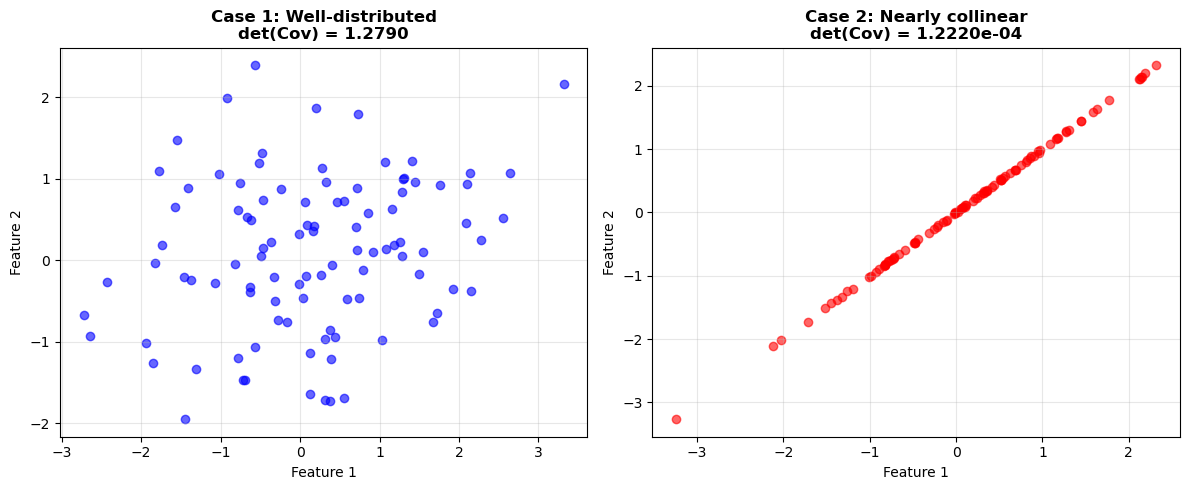


üéØ KEY TAKEAWAY:
   Determinants help identify problematic datasets BEFORE
   running expensive machine learning algorithms!
   det(Cov) ‚âà 0 ‚Üí redundant features ‚Üí poor model performance


In [11]:
# üöÄ REAL-WORLD APPLICATION: Data Analysis with Covariance Matrices

print("üî¨ PRACTICAL APPLICATION: Analyzing Data Covariance")
print("=" * 60)

# Generate sample 2D dataset
np.random.seed(42)
n_points = 100

# Case 1: Well-conditioned data (non-singular covariance)
print("\nüìä CASE 1: Well-distributed 2D data")
X1 = np.random.multivariate_normal([0, 0], [[2, 0.5], [0.5, 1]], n_points)
cov1 = np.cov(X1.T)
det1 = np.linalg.det(cov1)

print(f"Covariance matrix:\n{cov1}")
print(f"Determinant: {det1:.4f}")
print(f"Status: {'‚úÖ GOOD - Non-singular, can compute inverse' if det1 > 1e-10 else '‚ùå BAD - Nearly singular'}")

# Case 2: Nearly collinear data (nearly singular covariance)
print(f"\nüìä CASE 2: Nearly collinear data (problematic)")
X2 = np.random.randn(n_points, 2)
X2[:, 1] = X2[:, 0] + 0.01 * np.random.randn(n_points)  # Y ‚âà X
cov2 = np.cov(X2.T)
det2 = np.linalg.det(cov2)

print(f"Covariance matrix:\n{cov2}")
print(f"Determinant: {det2:.4e}")
print(f"Status: {'‚úÖ GOOD - Non-singular' if det2 > 1e-10 else '‚ö†Ô∏è WARNING - Nearly singular, numerical issues likely'}")

# Demonstrate the impact on machine learning
print(f"\nü§ñ MACHINE LEARNING IMPLICATIONS:")
print(f"Case 1 (det = {det1:.4f}):")
try:
    inv1 = np.linalg.inv(cov1)
    print(f"  ‚úÖ Inverse computable - ML algorithms will work well")
    print(f"  ‚úÖ Features are sufficiently independent")
except:
    print(f"  ‚ùå Cannot compute inverse")

print(f"\nCase 2 (det = {det2:.4e}):")
try:
    inv2 = np.linalg.inv(cov2)
    condition_number = np.linalg.cond(cov2)
    print(f"  ‚ö†Ô∏è Inverse computable but condition number = {condition_number:.2e}")
    print(f"  ‚ö†Ô∏è High condition number indicates numerical instability")
    print(f"  üí° Solution: Remove redundant features or use regularization")
except:
    print(f"  ‚ùå Cannot compute inverse - features are linearly dependent")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X1[:, 0], X1[:, 1], alpha=0.6, color='blue')
ax1.set_title(f'Case 1: Well-distributed\ndet(Cov) = {det1:.4f}', fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, alpha=0.3)

ax2.scatter(X2[:, 0], X2[:, 1], alpha=0.6, color='red')
ax2.set_title(f'Case 2: Nearly collinear\ndet(Cov) = {det2:.4e}', fontweight='bold') 
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nüéØ KEY TAKEAWAY:")
print(f"   Determinants help identify problematic datasets BEFORE")
print(f"   running expensive machine learning algorithms!")
print(f"   det(Cov) ‚âà 0 ‚Üí redundant features ‚Üí poor model performance")